In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 
import gzip
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA,IncrementalPCA
f = gzip.open('train-images-idx3-ubyte.gz','r')

image_size = 28
num_images = 300
f.read(16)
buf = f.read(image_size * image_size * num_images)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
data = data.reshape(num_images, image_size, image_size, 1)

(28, 28, 1)


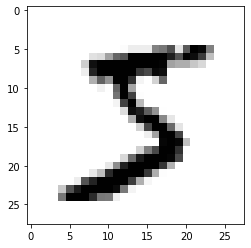

In [2]:
#displaying an image from datset
image = np.asarray(data[0])
print(image.shape)
plt.imshow(image,cmap='gray_r')
plt.show()

In [3]:
#checking the size of an image
data[0].shape

(28, 28, 1)

In [4]:
#verifying the shape of the imported dataset
data.shape

(300, 28, 28, 1)

In [8]:
###################################################################
#pca for only a single image of a dataset with first 20 components out of 28 to display an image
single_img=data[0,:,:,0]
single_img=StandardScaler().fit_transform(single_img)
arr_cov = (1 / 27) * single_img.T.dot(single_img)
eigen_values, eigen_vectors=np.linalg.eig(arr_cov)


indexes = np.argsort(-eigen_values)
eigen_values = eigen_values[indexes]
eigen_vectors = eigen_vectors[:,indexes]
pc=np.empty(shape=(28,20),dtype=float)
i=0
pc = eigen_vectors[:,0:20].T.dot(single_img)

In [6]:
print(eigen_values)

[ 6.2775316e+00  5.6314178e+00  3.6593444e+00  2.4160643e+00
  1.2841636e+00  6.0885501e-01  3.2873985e-01  1.7246802e-01
  1.5903814e-01  8.8486053e-02  4.2197376e-02  2.7022431e-02
  1.8652281e-02  1.5118348e-02  5.0773206e-03  4.3064952e-03
  1.9072229e-03  3.2708052e-04  2.4310584e-05  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00 -9.5628948e-08]


(20, 28)
(28, 28)


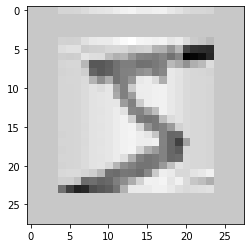

In [7]:

print(pc.shape)

pcFinal =  eigen_vectors[:,0:20].dot(pc)

print(pcFinal.shape)

plt.imshow(np.real(pcFinal),cmap='gray_r')
plt.show()


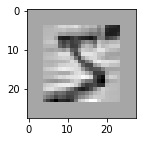

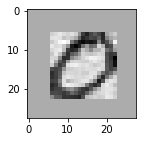

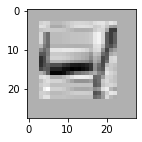

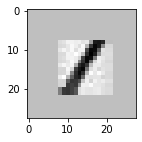

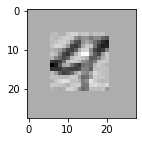

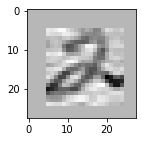

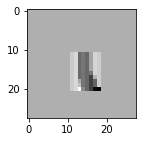

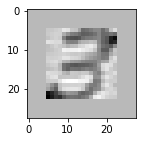

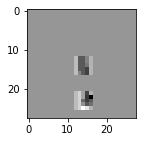

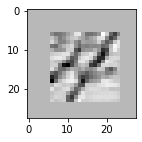

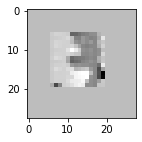

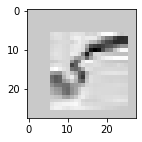

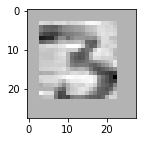

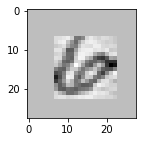

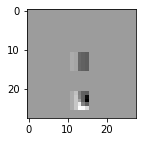

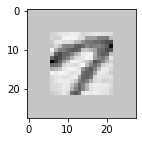

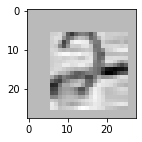

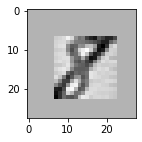

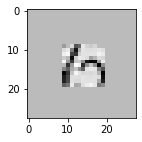

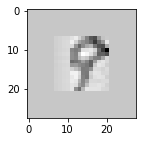

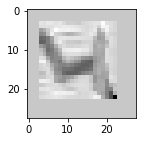

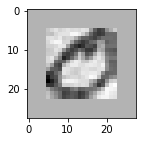

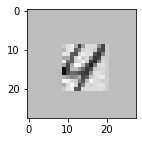

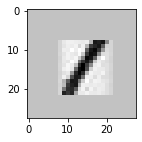

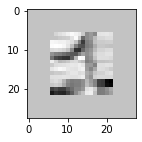

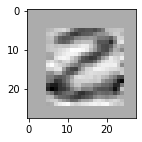

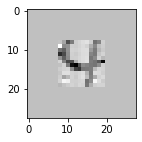

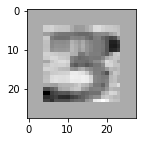

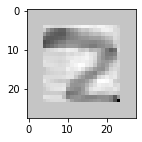

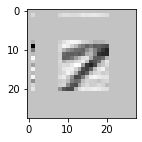

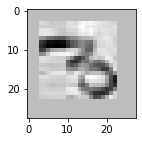

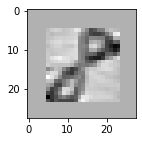

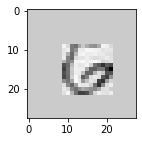

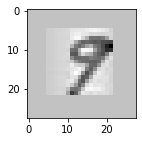

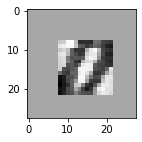

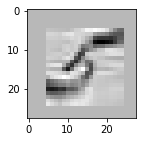

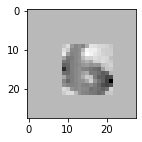

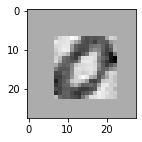

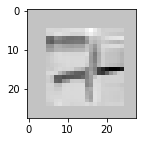

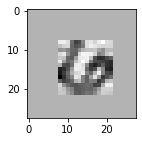

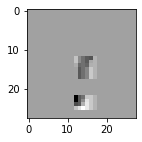

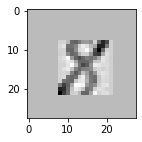

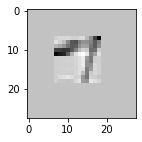

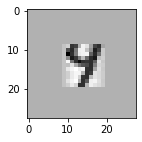

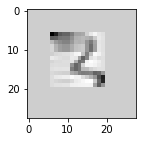

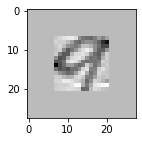

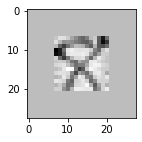

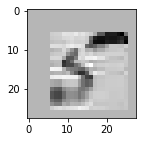

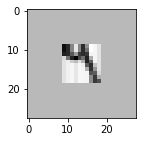

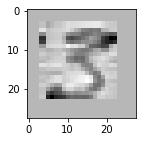

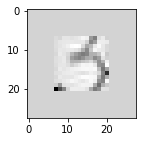

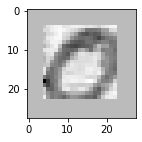

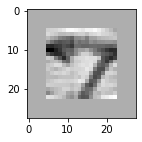

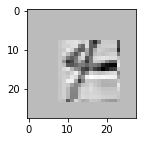

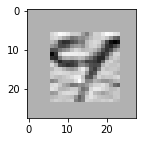

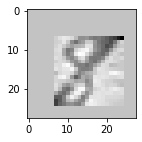

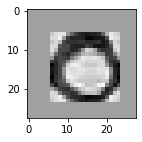

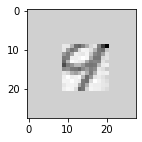

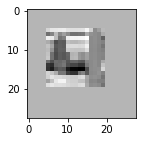

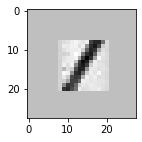

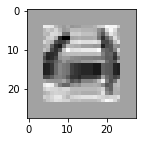

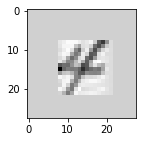

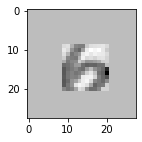

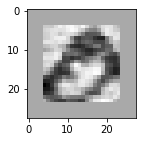

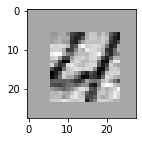

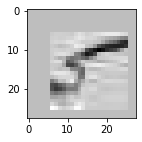

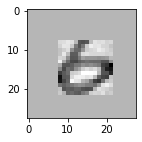

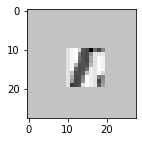

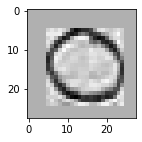

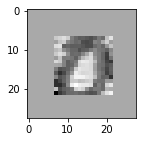

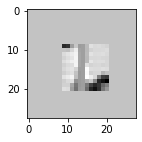

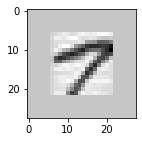

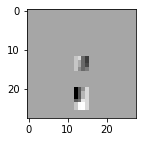

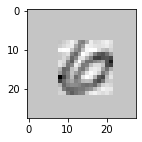

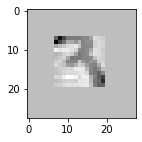

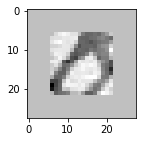

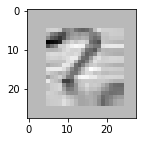

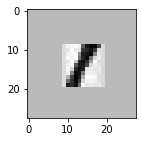

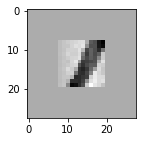

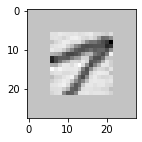

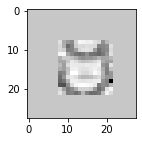

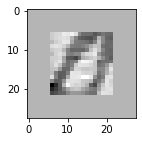

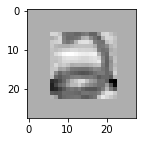

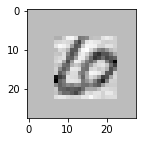

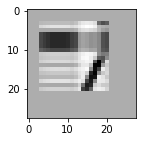

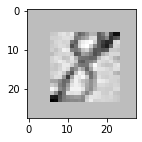

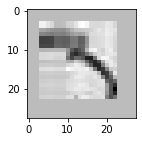

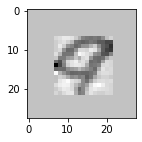

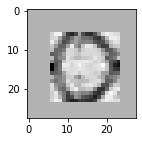

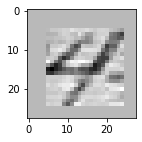

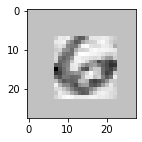

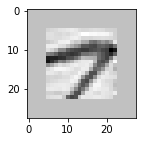

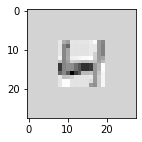

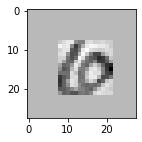

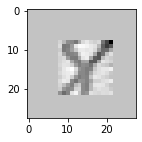

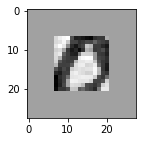

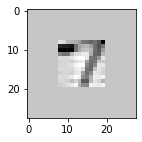

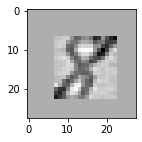

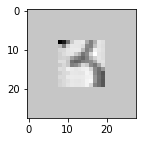

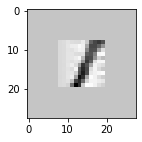

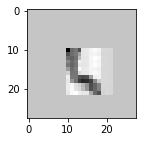

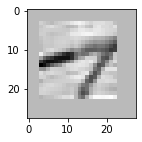

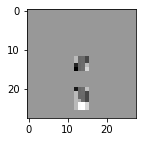

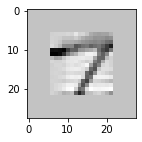

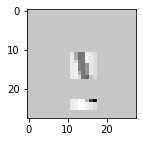

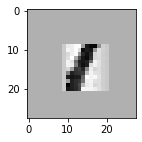

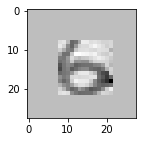

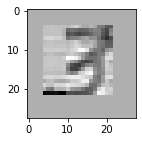

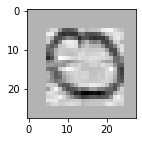

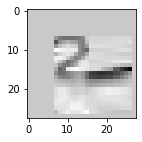

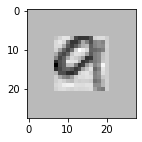

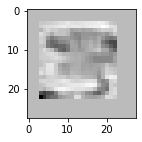

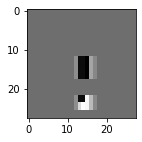

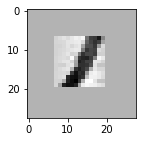

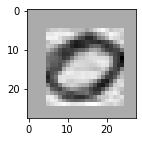

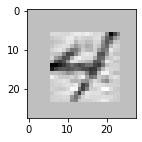

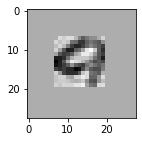

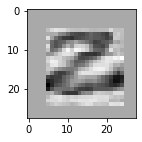

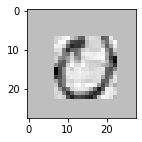

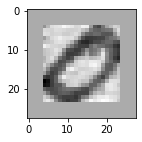

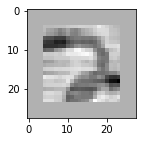

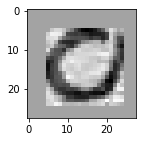

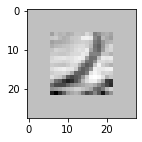

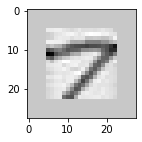

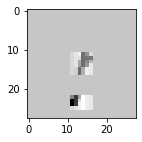

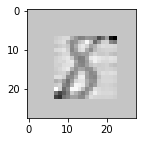

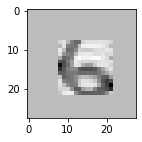

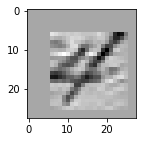

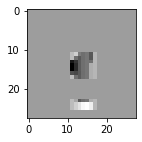

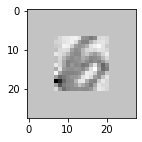

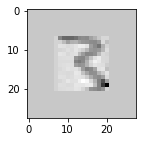

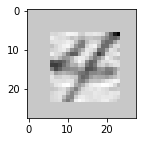

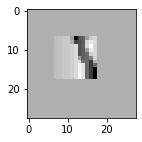

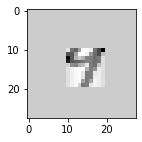

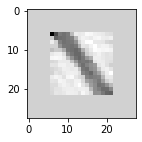

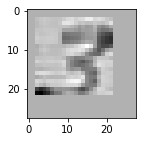

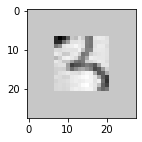

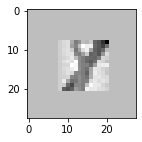

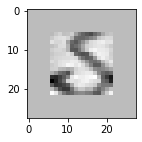

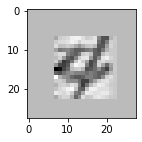

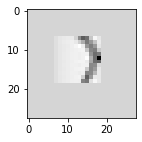

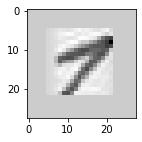

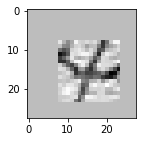

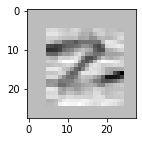

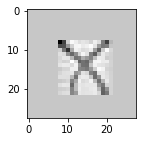

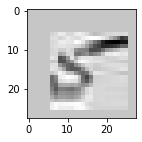

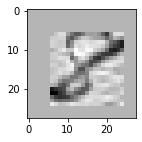

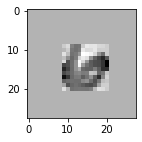

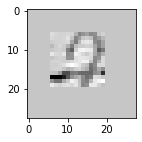

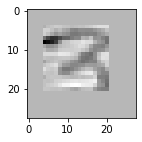

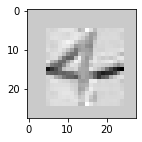

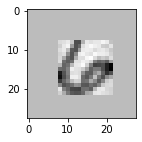

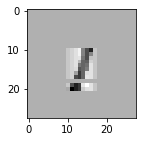

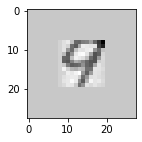

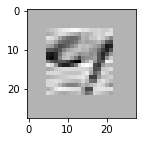

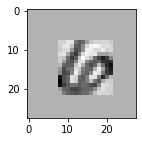

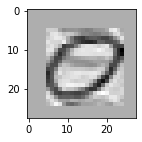

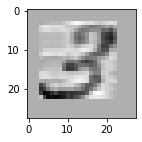

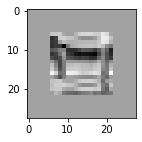

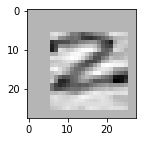

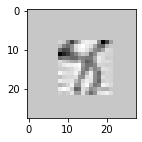

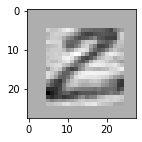

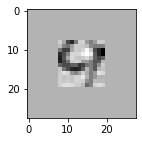

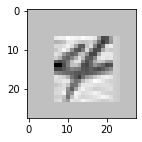

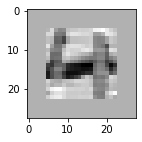

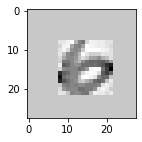

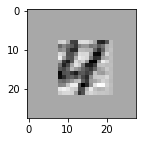

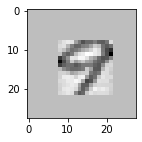

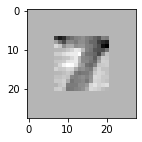

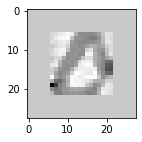

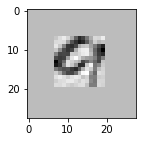

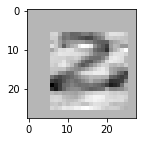

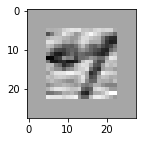

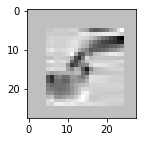

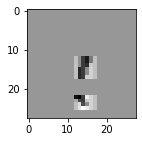

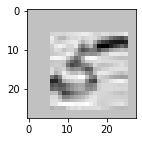

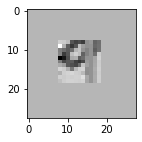

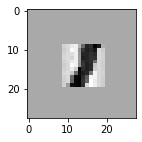

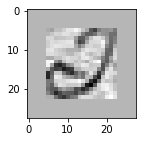

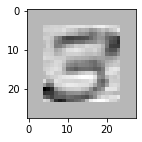

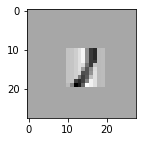

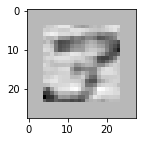

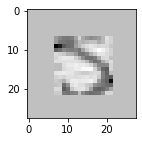

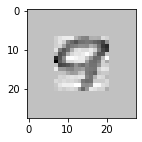

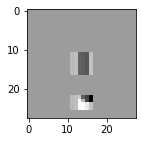

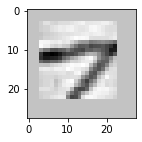

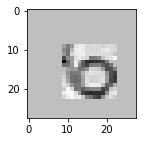

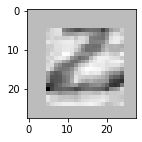

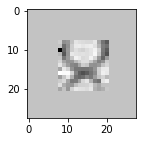

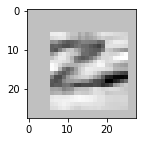

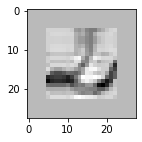

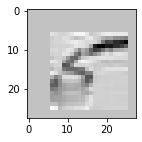

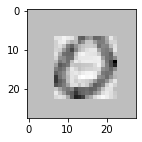

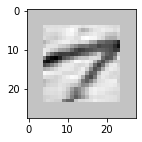

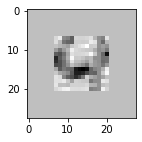

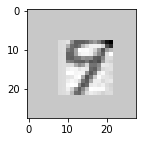

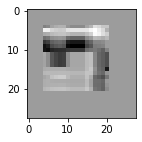

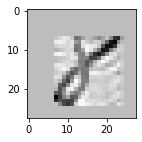

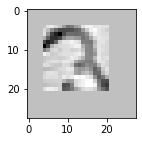

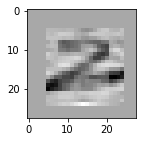

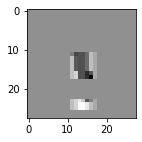

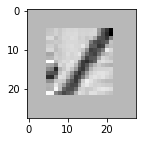

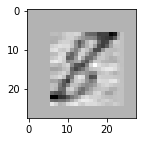

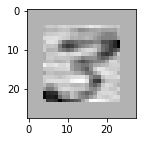

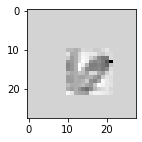

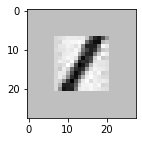

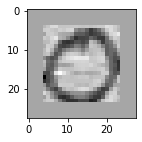

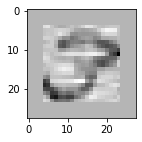

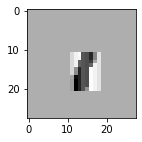

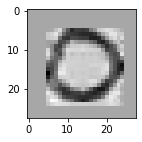

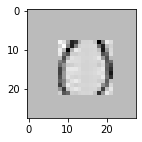

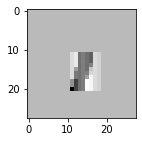

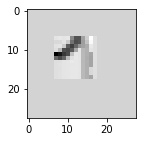

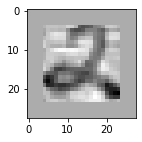

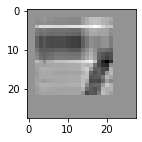

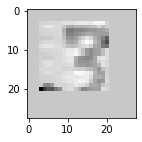

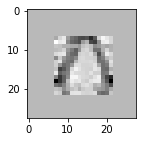

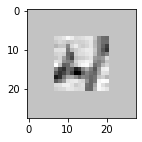

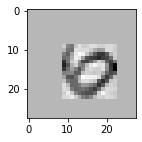

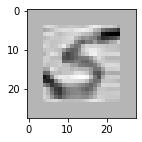

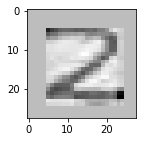

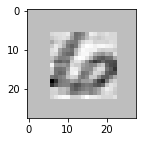

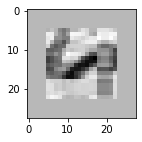

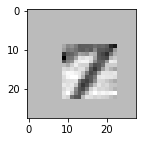

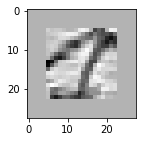

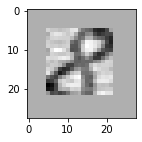

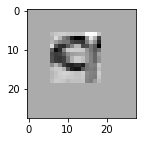

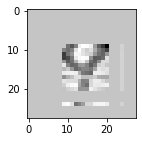

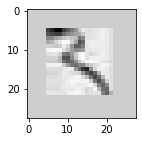

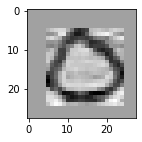

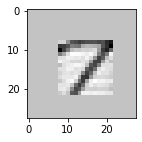

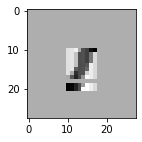

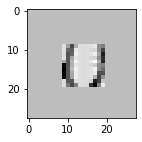

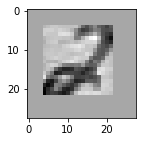

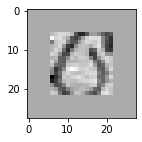

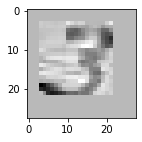

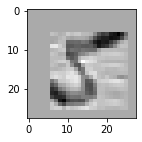

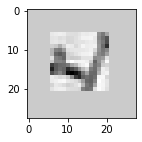

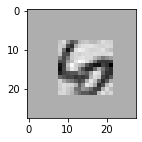

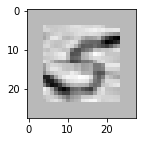

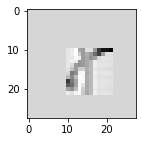

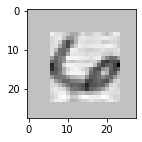

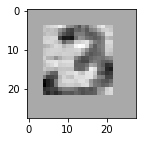

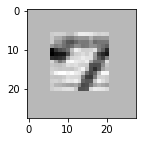

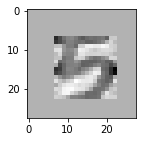

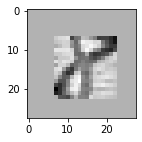

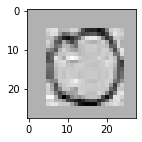

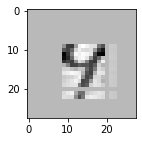

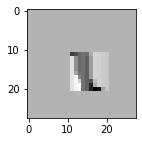

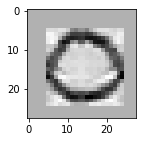

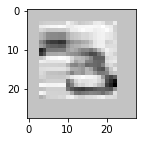

In [ ]:
#######################################################################
#pca on 300 images of datset with with using the first 20 components out of 28 to display a particular image 
def pca_on_datset(comp):
    i=0
    while i<=300:
        single_img=data[i,:,:,0]
        single_img=StandardScaler().fit_transform(single_img)
        arr_cov = (1 / 27) *single_img.T.dot(single_img)
        eigen_values, eigen_vectors=np.linalg.eig(arr_cov)


        indexes = np.argsort(-eigen_values)
        eigen_values = eigen_values[indexes]
        eigen_vectors = eigen_vectors[:,indexes]
        pc=np.empty(shape=(28,comp),dtype=float)
    
        pc = eigen_vectors[:,0:comp].T.dot(single_img)
    
        pcFinal =  eigen_vectors[:,0:comp].dot(pc)

    
        plt.figure(figsize=(2, 2))
        plt.imshow(np.real(pcFinal),cmap='gray_r')
        plt.show()
        i=i+1
        
pca_on_datset(10)#where 3 are the number of principal components and for differnet value of components we can change it in the function and can select the min component through which image is construcued quite same as the original one